In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob

%pylab inline
%matplotlib inline


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
filename = 'cr10_selection.csv'

df = pd.read_csv(filename,delimiter=',', header=7)  
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_index()

dfLS = pd.read_csv('LSradiation.csv', sep=',', header=0, parse_dates='time')
dfLS['time'] = pd.to_datetime(dfLS['time'])
dfLS = dfLS.set_index('time')
dfLS = dfLS.sort_index()

dfPW = pd.read_csv('BRI2005B.txt', delim_whitespace=True, header=2, parse_dates=[[0, 1, 2, 3]])
dfPW['time'] = pd.to_datetime(dfPW['YYYY_MM_DD_HH'], format='%Y %m %d %H')
dfPW = dfPW.set_index('time')
dfPW = dfPW.sort_index()

## Calculate DSi

In [3]:
# sum energy
#energy_scale = linspace(0.0407, 20.7977, 256)    # 0.0814 MeV per channel
energy_scale = linspace(0.2035, 20.8791, 255)    # 0.0814 MeV per channel
uGy_const = 1.602e-7 / 1.398e-4 * (3600/600)     # to uGy/h for 600 s
energy = df.ix[:,8:263].multiply(energy_scale)
#df.ix[:,9:]
df['DSi2'] = energy.ix[:,0:255].sum(axis=1) * uGy_const
df['count'] = df.ix[:,8:263].sum(axis=1) * (3600/600)
df['countL'] = df.ix[:,8:18].sum(axis=1) * (3600/600)
df['countH'] = df.ix[:,19:263].sum(axis=1) * (3600/600)


2005-05-08 00:29:00
2005-09-24 23:51:00


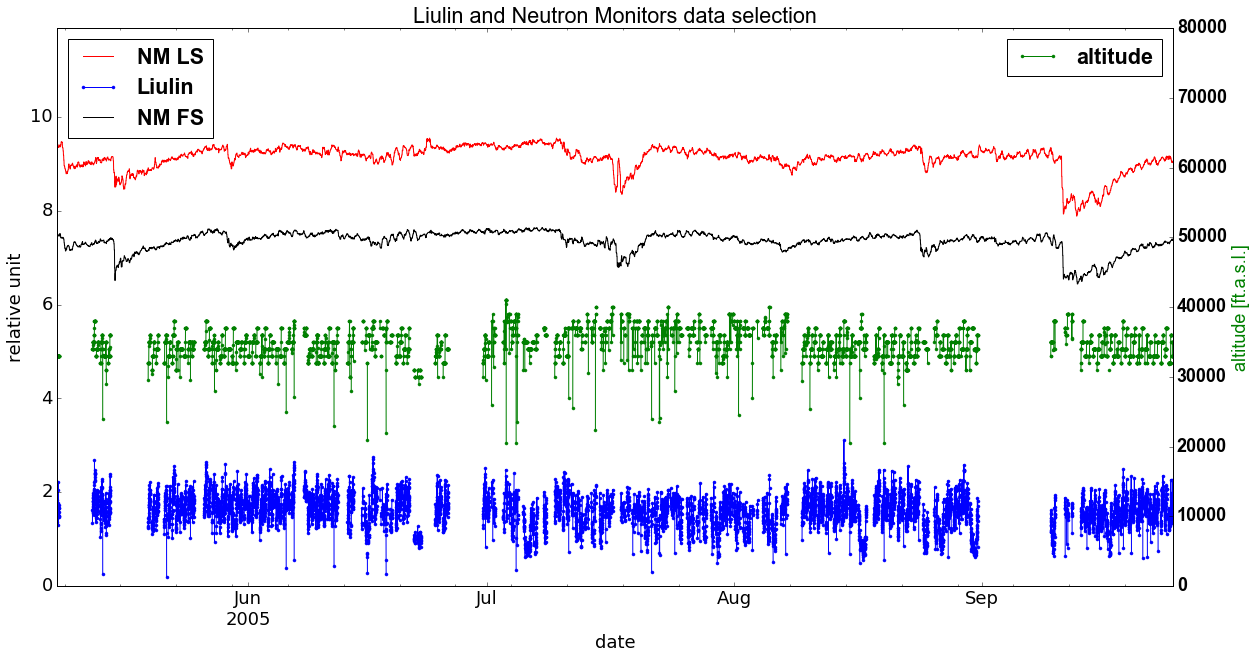

In [4]:
plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

print str(df.index[0])
print str(df.index[len(df)-1])
dff = dfLS[str(df.index[0]):str(df.index[len(df)-1])]
#dff = dff.set_index('date')
dff = dff.sort_index()
dff['LS'] = dff['FD']/10
#dfLS['2005-07-14 01:23': '2005-07-20 00:00']['FD'].plot(figsize=(20, 10))

dfd = df #df.drop(df[df.lon < 0].index)
#dfd = dfd.drop(dfd[dfd.lon > 20].index)
#dfd = dfd.drop(dfd[dfd.lat > 52].index)
#dfd = dfd.drop(dfd[dfd.lat < 47].index)
#dfd = dfd.drop(dfd[dfd.alt < 34000].index)
#dfd = dfd.drop(dfd[dfd.alt > 36000].index)

dff = dff.resample('10MIN', how='mean',  fill_method='pad') 
dfSi = dfd.resample('10MIN', how='mean') 
dfPW = dfPW.resample('10MIN', how='mean',  fill_method='pad') 

dfSi['NMLS'] = dff['LS']
dfSi['NMFS'] = dfPW['Corr']/1000
#(dfPW['1']/1000).plot(marker='.', color='brown')
plt.ylim([0,11.9])
plt.ylabel('relative unit')
dff['LS'].plot(color='red', label ='NM LS')
dfSi['DSi2'].plot(marker='.', label ='Liulin')#, linestyle='')
dfSi['NMFS'].plot(color='black', label ='NM FS')#, linestyle='')
plt.legend(loc=2)
#(df['count']/100).plot()
#(df['countL']/100).plot()
#(df['countH']/10).plot()

twinx()
plt.ylim([0,80000])
plt.ylabel('altitude [ft.a.s.l.]', color='green')
dfSi['alt'].plot(marker='.', color='green', label ='altitude')

plt.title('Liulin and Neutron Monitors data selection')  
plt.legend()

## Remove channels

In [63]:
dfSi = dfSi[['lat','lon','alt','DSi','DSi2','count','countL','countH','H','E','NMLS','NMFS']]
dfSi = dfSi.round({'lat':5,'lon':5,'alt':0,'DSi':2,'DSi2':2,'count':1,'countL':1,'countH':1,'H':2,'E':2,'NMLS':3,'NMFS':3})
dfSi.to_csv('Liulin_NM.csv')
print len(dfSi)

20158


len 355
max 35026.0
min 34931.0


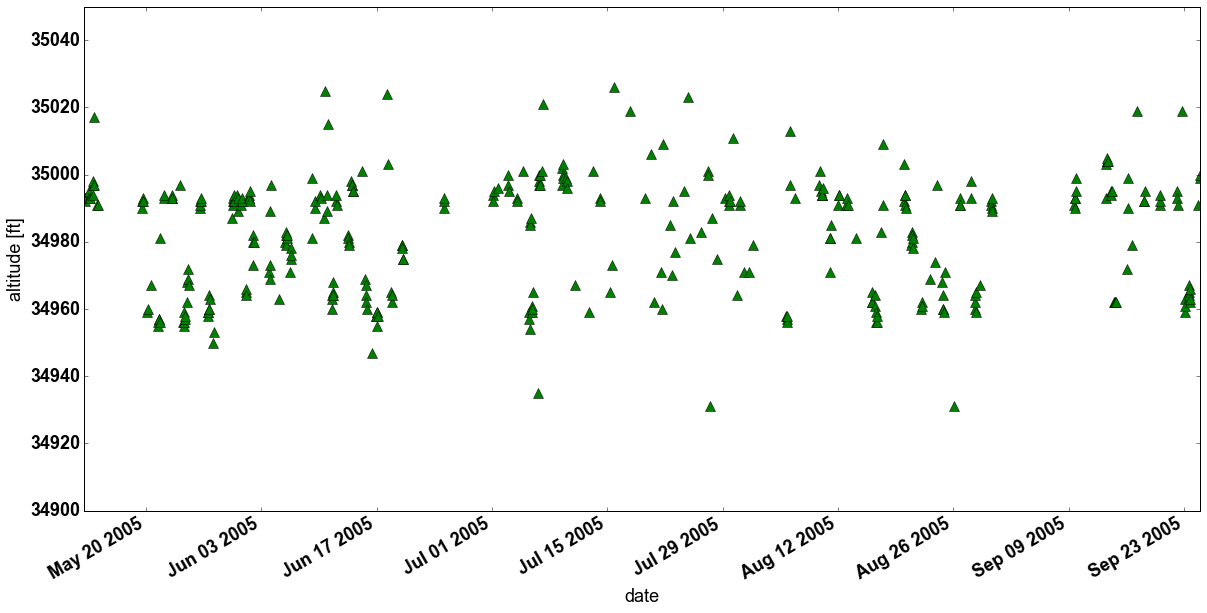

In [73]:
plt.figure(figsize=(20, 10))
dfOUT = dfSi[dfSi.alt>=34930]
dfOUT = dfOUT[dfOUT.alt<=35030]
dfOUT = dfOUT.resample('60MIN', how='mean')
dfOUT = dfOUT.dropna()
dfOUT = dfOUT.round({'lat':5,'lon':5,'alt':0,'DSi':2,'DSi2':2,'count':1,'countL':1,'countH':1,'H':2,'E':2,'NMLS':3,'NMFS':3})
plt.ylim([34900,35050])
plt.ylabel('altitude [ft]')
dfOUT['alt'].plot(marker='^', color='green',linestyle='None', markersize=10)
print 'len', len(dfOUT)
print 'max', dfOUT['alt'].max()
print 'min', dfOUT['alt'].min()
dfOUT.to_csv('Liulin_NM_35000ft_1h.csv')

len 7322
max 40967.0
min 20431.0


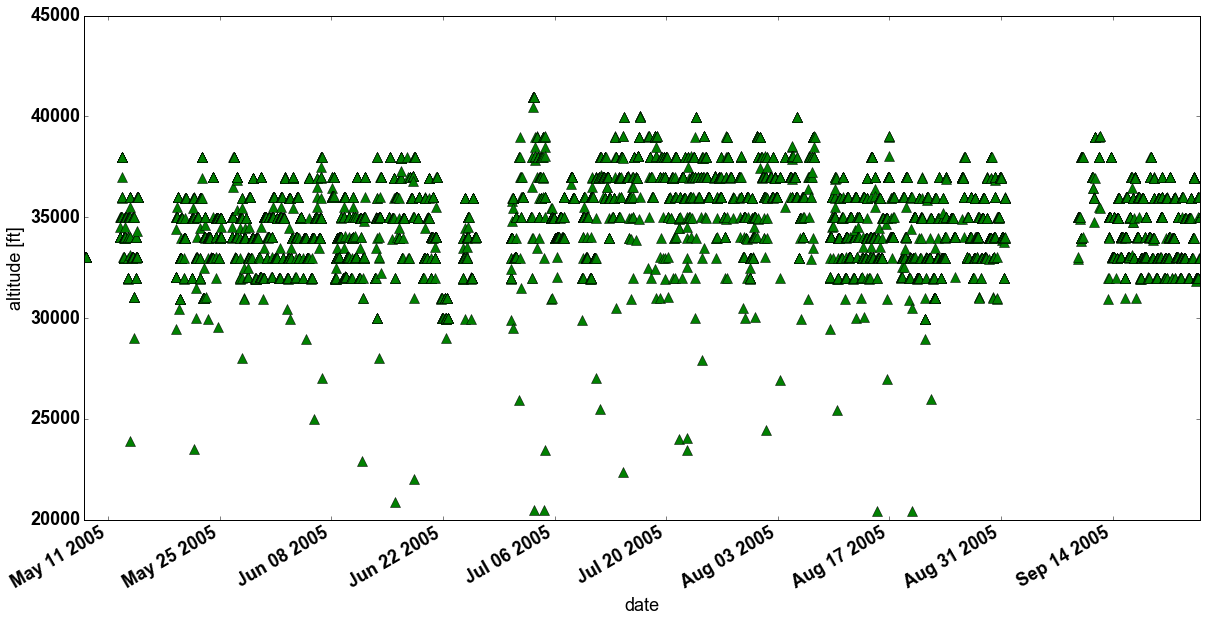

In [67]:
plt.figure(figsize=(20, 10))
dfOUT = dfSi[dfSi.alt>=0]
dfOUT = dfOUT[dfOUT.alt<=60030]
#plt.ylim([34900,35050])
plt.ylabel('altitude [ft]')
dfOUT['alt'].plot(marker='^', color='green',linestyle='None', markersize=10)
print 'len', len(dfOUT)
print 'max', dfOUT['alt'].max()
print 'min', dfOUT['alt'].min()
dfOUT.to_csv('Liulin_NM_xxft.csv')

In [55]:
# MAP

import cartopy.crs as ccrs  # maps plotting library
from cartopy.io.img_tiles import GoogleTiles
#from cartopy.io.img_tiles import OSM
from cartopy.io.srtm import srtm_composite

#filename = 'cr10_selection.csv'

#df = pd.read_csv(filename,delimiter=',', header=7, usecols=['date','lat','lon','alt','H'])
#df['date'] = pd.to_datetime(df['date'])
#df = df.set_index('date')

print filename


plt.figure(figsize=(20, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
#ax.set_extent([-10, +140, 0, +90])
ax.set_extent([-160, +160, -90, +90])
#gg_tiles = GoogleTiles()
#gg_tiles = OSM()
#ax.add_image(gg_tiles, 4)
ax.coastlines()
#df = pd.read_csv(filename,sep=',', header=0 )
#df = df[df['0']>10]


#plt.scatter(lon, lat, marker=(5, 1), color='red', s=200)
#plt.title("date: " + date)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False

#ax = plt.axes(projection=ccrs.PlateCarree())
#!!!!podkladova mapa ax.stock_img()

#df = df.resample('1H', how='mean', base=0)
'''
for i in range(len(df)):
    if df['H'][i] > 0:
        if df['alt'][i] > 32000:
            plt.plot(df['lon'][i], df['lat'][i],
                 color=plt.cm.jet(df['H'][i]/10), 
                 marker='.',
                 transform=ccrs.PlateCarree(), #lw=3
                 )
'''

#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=10))
#sm._A = []
#cb = plt.colorbar(sm, shrink=0.7)
#cb.set_label('H*(10)[uSy/h]')
#plt.show()




ImportError: libproj.so.0: cannot open shared object file: No such file or directory